# Data management

## Machine Learning - Regressions

## [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306]()


Regression belongs like classification to the field of **supervised learning**. 


<div class="alert alert-block alert-warning">
<i class="fa fa-info-circle"></i>&nbsp; 
<strong>Regression predicts numerical values</strong> 
in contrast to classification which predicts categories.
</div>

<div class="alert alert-block alert-warning">
<i class="fa fa-info-circle"></i>&nbsp; 
    Other differences are:
<ul>
    <li> Accuracy in measured differently </li>
    <li> Other algorithms </li>
   </ul>

</div>

In [1]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn

## Supervised ML Workflow

Step 1: [Define the Prediction Task](#background)  

Step 2: [Explore the Data](#eda)  

Step 3: [Set Model and Tuning Parameters](#model)  

Step 4: [Cross-validation](#cv)  

Step 5: [Evaluate the Model](#eval)  

## Step 1: Define the Prediction Task <a id='background'></a>

### Boston housing data

We will use the **Boston housing data**: housing data for 506 census tracts of Boston from the 1970 census (Harrison and Rubinfeld, 1978).

The sample is available from `sklearn` and contains :
- 13 attributes of housing markets around Boston 
  - `medv` (target): median value of owner-occupied homes in USD 1000's.
  - `lstat`(predictor): percentage of lower status of the
  population.
  - `chas` (predictor): Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- 506 entries: aggregated data for homes from various suburbs in Boston, Massachusetts.

*Objective*: **predict the value of prices `medv`** of the house using the given features

### Set up and load data

In [3]:
df = pd.read_csv("/Users/malka/Dropbox/teaching-uliege/OTHER-by-fieldXlevel/data/ml4econ/04-ml-workflow/data/BostonHousing.csv")

The data contain the following variables:

| **Variable** | **Description** |
|--------------|-----------------|
| CRIM         | per capita crime rate by town |
| ZN           | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS        | proportion of non-retail business acres per town |
| CHAS         | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX          | nitric oxides concentration (parts per 10 million) |
| RM           | average number of rooms per dwelling |
| AGE          | proportion of owner-occupied units built prior to 1940 |
| DIS          | weighted distances to five Boston employment centres |
| RAD          | index of accessibility to radial highways |
| TAX          | full-value property-tax rate per $10,000 |
| PTRATIO      | pupil-teacher ratio by town |
| B            | 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town |
| LSTAT        | % lower status of the population | 

In [ ]:
df.describe()

### Create $X$ and $y$

In [ ]:
X_full=df.drop('medv', axis=1)
y_full= df['medv']

n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples, n_features)

In [ ]:
X_full.head()

#### Look for `NA` values in the dataset

In [ ]:
X_full.isna().sum()

There is none

## Step 2: Exploratory Data Analysis  <a id='eda'></a>

### Quantity to predict= price (`target` or $y$) 

Before the regression, let us inspect the features and their distributions. 

In [ ]:
y_full.shape

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})
plt.hist(y_full, bins=30)
plt.xlabel("House prices in $1000", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of median price in each neighborhood', size=20)
plt.show()

### Features ($X$) used for prediction

In [ ]:
X_full.shape

#### Distributions
**Histogram plots** to look at the distribution

In [ ]:
X_full.hist(bins=50, figsize=(15,10))
plt.show()

### Correlations

**Boston Correlation Heatmap Example with Seaborn**

The seaborn package offers a heatmap that will allow a two-dimensional graphical representation of the Boston data. The heatmap will represent the individual values that are contained in a matrix are represented as colors.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
correlation_matrix = X_full.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()

### Check for multicolinearity

An important point in selecting features for a linear regression model is to check for **multicolinearity**. 

The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. 

Same goes for the features DIS and AGE which have a correlation of -0.75.

### Correlation plots

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_full, figsize=(12, 8))

### Scatter plot relative to the target (price)

In [ ]:
(X_full.columns)

In [ ]:
fig, axs= plt.subplots(3, 5, figsize=(20, 12))


In [ ]:
fig, axs= plt.subplots(3, 5, figsize=(20, 12))
i=0
for ax in axs.flat:
    if i<len(X_full.columns):
        feature_name = X_full.columns[i]  
        ax.scatter(X_full[feature_name], y_full, alpha=0.1)
        ax.set(xlabel=feature_name, ylabel='Price')
        i=i+1


### What can we say ? 

- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

## Before we go  to the next step, our first linear model


###  Linear Regression (Theory) 

$$Y=\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \epsilon $$

$=$ one of the simplest algorithms for doing supervised learning

A good starting point before studying more complex learning methods

*Notes*:

Interpretation of $\beta_j$ = the average effect on $Y$ of a unit increase in $X_j$ holding all other predictors fixed


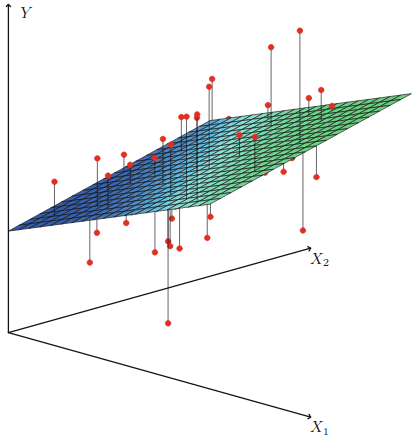

### Extensions of the Linear Model

Going further model's assumptions:

- the **additive**: the effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors

-  **linearity**: the change in the response $Y$ due to a one-unit change in $X_j$ is constant


#### Interactions
- Adding interacted variable can help
- Should respect the <bcolor>hierarchy principle</bcolor>:
  - if an interaction is included, the model should always include the main effects as well

Notes:
- Even if the p-value associated with their coef is not significant
- Interactions are hard to interpret without main effects in the model

#### Non Linearity
- Include transformed versions of the predictors in the model


$\Rightarrow$ Including polynomials in $X$ may provide a better fit

### Linear Models: pros and cons

- [Pros]():
  - Interpretability
  - Good predictive performance
  - Accuracy measures for
      - coefficient estimates (standard errors and confidence intervals)
      - the model

- [Cons]():
  - When $p>n$
  - Tend to over-fit training data.
  - Cannot handle multicollinearity.

### Scikit-Learn Design Overview

#### Transformer (preprocessor): An object that transforms a data set.
- e.g. `preprocessing.StandardScaler`
- Transformation is performed by the `transform()` method.

#### Estimator: an object that can estimate parameters
- e.g. `linear_models.LinearRegression`
- Estimation performed by `fit()` method
- Exogenous parameters (provided by the researcher) are called `hyperparameters`
- The convenience method `fit_transform()` both fits an estimator and returns the transformed input data set.

#### Predictor: An object that forms a prediction from an input data set.
- e.g. `LinearRegression`, after training
- The `predict()` method forms the predictions.
- It also has a `score()` method that measures the quality of the predictions given a test set.

#### Miscellaneous
- **Inspection**: Hyperparameters and parameters are accessible. Learned parameters have an underscore suffix (e.g.`lin_reg.coef_`)
- **Non-proliferation of classes**: Use native Python data types; existing building blocks are used as much as possible.
- **Sensible defaults**: Provides reasonable default values for hyperparameters – easy to get a good baseline up and running

## Step 3: Set Model and Tuning Parameters  <a id='model'></a>

### Data cleaning
The missing features should be either:
1. dropped
2. imputed to some value (zero, the mean, the median...)

Drop the observations with price >=50 (because of the right censure)

In [17]:
mask=y_full<50

y_full=y_full[mask==True]
X_full=X_full[mask==True]
X_df=y_full[mask==True]

### Prepare Training and Test Sets using `train_test_split`
Pure ramdomness of the sampling method

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,test_size=0.2, random_state=1)
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

### Feature Scaling
Most common scaling methods: 
- **standardization**= normalization by substracting the mean and dividing by the standard deviation (values are not bounded)
- **Min-max scaling**= normalization by substracting the minimum and dividing by the maximum (values between `0` and `1`)

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Select and Train a Model
**Regression algorithm** (we consider firs the `LinearRegression`, more algorithms will be discussed later):

In [ ]:
# our first machine learning model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

<div class="alert alert-block alert-warning">
    <i class="fa fa-warning"></i>&nbsp;<strong><code>scikit-learn</code> API</strong>

In <code>scikit-learn</code> all regression algorithms have:
<ul>
    <li>a <strong><code>fit()</code></strong> method to learn from data, and</li>
    <li>and a subsequent <strong><code>predict()</code></strong> method for predicting numbers from input features.</li>
</ul>
</div>

In [ ]:
lin_reg.fit(X_train_scaled, y_train)

In [ ]:
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train_scaled, y_train), 2)))

In [ ]:
lin_reg.fit(X_train_scaled, y_train)
print("R-squared for training dataset & scaled features:{}".
      format(np.round(lin_reg.score(X_train_scaled, y_train), 2)))

Note: $R^2 =$ **the proportion of variance (of $y$) that has been explained by the independent variables in the model**. 


#### Coefficients of the linear regression

In [ ]:
lin_reg.coef_

In [ ]:
features = list(X_full.columns)
features

In [ ]:
print('The coefficients of the features from the linear model:')
print(dict(zip(features, [round(x, 2) for x in lin_reg.coef_])))

## Step 4: Cross-validation  <a id='cv'></a>

<div class="r-stack"><img src="images/grid_search_workflow.png" style="height: 300px;" > </div>

### K-Fold CV

In [27]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

In [ ]:
# Perform 5-fold cross validation
scores = cross_val_score(lin_reg, X_train_scaled, y_train, 
                         scoring="neg_mean_squared_error", 
                         cv=5)
scores

In [ ]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lin_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=folds)
scores   

### Hyperparameter Tuning Using Grid Search Cross-Validation

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation. 

<div class="r-stack"><img src="images/grid-search.png" style="height: 300px;" > </div>


In [ ]:
# 1. create a cross-validation scheme
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,random_state=2, shuffle=True) 
kfold

In [31]:
# 2. specify range of hyperparameters to tune
param_grid = [
  {'alpha': [0.0001, 0.001, 0.01, 0.1 ,1, 10],
      'l1_ratio':[.1,.5,.9,1]}
    
]

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# 3. perform grid search
# 3.1 specify model
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()  

In [34]:
# 3.2 call GridSearchCV()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
model_cv = GridSearchCV(elastic_net, param_grid, cv=kfold,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
# fit the model
model_cv.fit(X_train_scaled, y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results.loc[cv_results['param_alpha']==10,"param_l1_ratio"], cv_results[cv_results['param_alpha']==10]["mean_test_score"])
plt.plot(cv_results.loc[cv_results['param_alpha']==10,"param_l1_ratio"], cv_results[cv_results['param_alpha']==10]["mean_train_score"])
plt.xlabel('L1 ratio')
plt.ylabel('Negative MSE')
plt.title("Optimal L1 ratio parameter for alpha=10")    
plt.legend(['test score', 'train score'], loc='upper right')

## Step 5: Evaluate the Model  <a id='eval'></a>



Now we can choose the optimal value of number of features and build a final model.


In [ ]:
best_alpha = model_cv.best_params_['alpha']
best_l1_ratio = model_cv.best_params_['l1_ratio']
print("Best alpha: ", best_alpha,   "Best l1_ratio: ", best_l1_ratio)   

In [ ]:
# Fit model (to the training set) with optimal alpha and l1_ratio
elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)  
elastic_net.fit(X_train_scaled, y_train)

In [40]:
# predict prices of X_test
y_test_pred = elastic_net.predict(X_test_scaled)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("RMSE on test data: ", test_rmse)

NOTE: the test set RMSE estimates the expected squared prediction error on unseen data given the best model.

### More on metrics / error measures   

`scikit-learn` offers the following metrics for measuring regression quality:


The scoring parameter: defining model evaluation rules 

#### Mean squared error (mse)

Here we replace the absolute difference by its squared difference. Squaring also insures positive differeces.


<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>mean squared error</strong> is defined as 



$$
\frac{1}{n} \left(\, (y_1 - \hat{y}_1)^2 \, + \, (y_2 - \hat{y}_2)^2 \, \, \ldots \,+ \,(y_n - \hat{y}_n)^2 \,\right)
$$


</div>



This measure is more sensitive to **outliers**: A few larger differences contribute more significantly to a larger mean squared error. 

`neg_mean_squared_error` in `scikit-learn`.

#### Mean absolute error

Taking absolute values before adding up the deviatons assures that deviations with different signs can not cancel out.

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>mean absolute error</strong> is defined as 


$$
\frac{1}{n} \left(\, |y_1 - \hat{y}_1| \, + \, |y_2 - \hat{y}_2| \, + \, \ldots \,+ \,|y_n - \hat{y}_n| \,\right)
$$


</div>


`neg_mean_absolute_error` in `scikit-learn`.

#### Median absolute error

Here we replace mean calculation by median. 

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>median absolute error</strong> is defined as 



$$
\text{median}\left(\,|y_1 - \hat{y}_1|, \,|y_2 - \hat{y}_2|, \,\ldots, \,|y_n - \hat{y}_n| \, \right)
$$


</div>


This measure is less sensitive to outliers: A few larger differences will not contribute significantly to a larger error value. 

`neg_median_absolute_error` in `scikit-learn`.

#### Mean squared log error

The formula for this metric can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-log-error). 

This metric is recommended **when your target values are distributed over a huge range of values**, like popoluation numbers. 

The previous error metrics would put a larger weight on large target values. 

The name is `neg_mean_squared_log_error`

In the context of the evaluation step, we always try to maximise the score: this is why we use here the `neg_mean_squared_error`

### Evaluating Regression Models: $R^2$

The $R^2$-score 
- = **the proportion of variance (of $y$) that has been explained by the independent variables in the model**. 
- takes values in the range $[0, 1]$. $\Rightarrow $  larger values indicate better regression results.

- The name within `scikit-learn` is `R2`. 

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>$R^2$</strong> is defined as 

$$
R^2= 1-\frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

</div>


<div class="alert alert-info">
<h3> Your turn</h3>
    <ul>
        <li>Propose a similar `gridsearch` approach by evaluate the model using a R2.
        </li>
        <li> Do you find similar optimal parameters? 
        </li>
    </ul>    
</div>

In [42]:
# Define the cross-validation approach


In [ ]:
# fit the model


In [ ]:
# Best parameters are the ones that maximize the R2 score:


#### MSE vs. $R^2$ 

MSE :  
- good for comparing regression models, 
- but the units depend on the outcome variable and 
- $\Rightarrow$ are not interpretable

Better to use $R^2$ in the test set: same ranking as MSE but it **more interpretable**.

## More on the standard linear regression model

### Binned Regression Plots
Always plot your prediction errors

In [ ]:
r2 = round(elastic_net.score(X_test_scaled, y_test), 2)
r2

In [ ]:
# Regplot
g=sns.regplot(x= y_test_pred, y=y_test, x_bins=100)
g=g.set_title("Test sample")

plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

### Plotting Regression Residuals

In [ ]:
#Let us plot how good given and predicted values match on the training data set (sic !).
def plot_fit_quality(values_test, predicted):
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)

    x = np.arange(len(predicted))
    plt.scatter(x, predicted - values_test, color='steelblue', marker='o') 

    plt.plot([0, len(predicted)], [0, 0], "k:")
    
    max_diff = np.max(np.abs(predicted - values_test))
    plt.ylim([-max_diff, max_diff])
    
    plt.ylabel("error")
    plt.xlabel("sample id")

    plt.subplot(1, 2, 2)

    plt.scatter(x, (predicted - values_test) / values_test, color='steelblue', marker='o') 
    plt.plot([0, len(predicted)], [0, 0], "k:")
    plt.ylim([-.5, .5])
      
    plt.ylabel("relative error")
    plt.xlabel("sample id")

plot_fit_quality(y_test, y_test_pred)

### Polynomial regression
#### Polynomial features

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2)

X_train_poly=poly_features.fit_transform(X_train)

<div class="alert alert-info">
<h4> Your turn</h4>
    <ul>
        <li>Use the polynomial features to train and evaluate a linear regression model.
        </li>
         <li>Do you think that there is some overfitting? .
        </li>
    </ul>
</div>




In [49]:
# Apply the polynomial transformation to the test data


In [ ]:
# Fit the model


In [51]:
# Predict the outcome using the estimated model


In [ ]:
# Evaluate the model using a R2 and RMSE


In [53]:
# Overfitting ?

# There is some overfitting in the model as we can see from the R2 values: much higher in the train set than in the test set.